## Descriptores de textura

- LBP
- GLCM

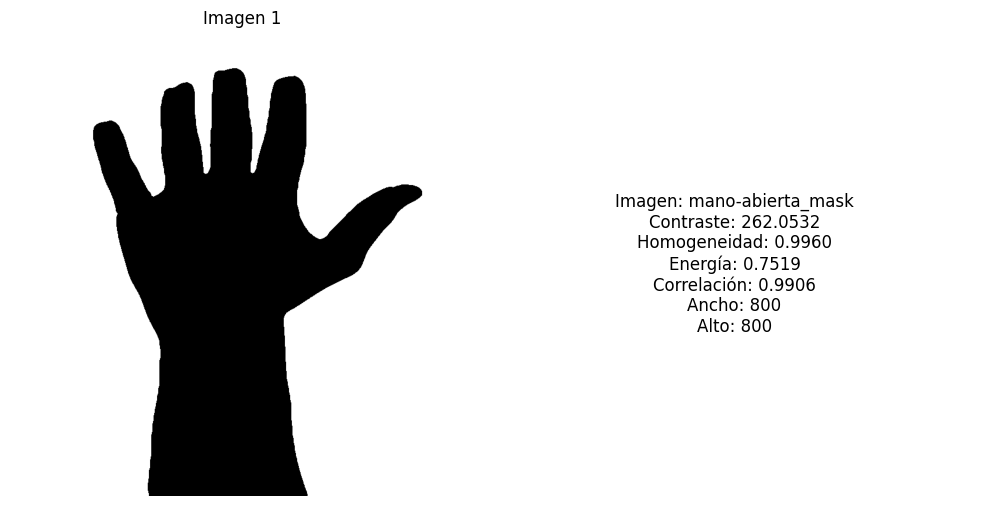


✓ Procesamiento de texturas completado para mano-abierta_mask
  - Resultados guardados en: data/caracteristicas/texturas\mano-abierta_mask_texturas.png


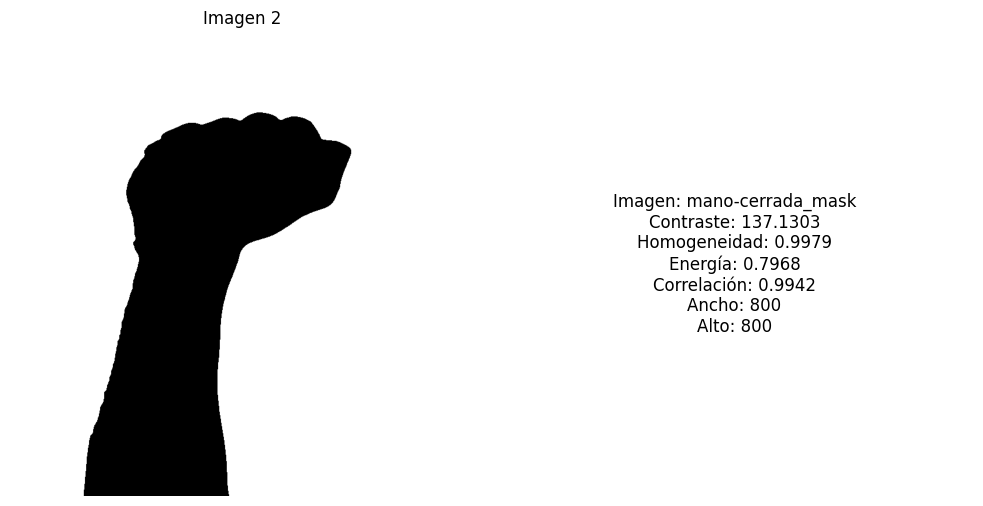


✓ Procesamiento de texturas completado para mano-cerrada_mask
  - Resultados guardados en: data/caracteristicas/texturas\mano-cerrada_mask_texturas.png


In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops

# Rutas y lista
os.makedirs('data/caracteristicas', exist_ok=True)
os.makedirs('data/caracteristicas/texturas', exist_ok=True)

imagenes = ['data/procesadas/mano-abierta_mask.png', 'data/procesadas/mano-cerrada_mask.png']
all_metrics = []

for imagen in imagenes:
    img_name = os.path.splitext(os.path.basename(imagen))[0]

    img = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"No se pudo leer la imagen '{imagen}'")
        continue

    # LBP
    lbp = local_binary_pattern(img, P=8, R=1, method='uniform')

    # GLCM
    glcm = graycomatrix(img, distances=[1], angles=[0], symmetric=True, normed=True)

    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    metrics = {
        'Imagen': img_name,
        'Contraste': contrast,
        'Homogeneidad': homogeneity,
        'Energía': energy,
        'Correlación': correlation,
        'Ancho': img.shape[1],
        'Alto': img.shape[0]
    }

    all_metrics.append((img, metrics))

# Mostrar imágenes y métricas
for idx, (img, metrics) in enumerate(all_metrics):
    plt.figure(figsize=(10, 5))

    # Mostrar imagen
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Imagen {idx + 1}")
    plt.axis('off')

    # Mostrar métricas
    plt.subplot(1, 2, 2)
    plt.axis('off')
    metric_text = "\n".join([f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}" for key, value in metrics.items()])
    plt.text(0.5, 0.5, metric_text, fontsize=12, ha='center', va='center')

    plt.tight_layout()

    # Guardar figura comparativa
    output_path = os.path.join('data/caracteristicas/texturas', f"{metrics['Imagen']}_texturas.png")
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    plt.show()

    print(f"\n✓ Procesamiento de texturas completado para {metrics['Imagen']}")
    print(f"  - Resultados guardados en: {output_path}")

## Detección de bordes
- Sobel
- Canny

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Rutas y lista
os.makedirs('data/caracteristicas', exist_ok=True)
os.makedirs('data/caracteristicas/bordes', exist_ok=True)

imagenes = ['data/procesadas/mano-abierta_mask.png', 'data/procesadas/mano-cerrada_mask.png']

# Función para calcular métricas
def calcular_metricas(edges, name, img_gray):
    # Contar píxeles de borde
    edge_pixels = np.sum(edges > 0)
    total_pixels = edges.size
    edge_ratio = (edge_pixels / total_pixels) * 100  # Porcentaje

    # Intensidad media y desviación estándar
    edge_intensities = img_gray[edges > 0]
    mean_intensity = np.mean(edge_intensities) if len(edge_intensities) > 0 else 0
    std_intensity = np.std(edge_intensities) if len(edge_intensities) > 0 else 0

    return {
        'Método': name,
        'Píxeles_Borde': edge_pixels,
        'Porcentaje_Borde': edge_ratio,
        'Intensidad_Media': mean_intensity,
        'Desviación_Estándar': std_intensity
    }

for imagen in imagenes:
    img_name = os.path.splitext(os.path.basename(imagen))[0]

    img = cv2.imread(imagen)
    if img is None:
        print(f"No se pudo leer la imagen '{imagen}'")
        continue

    # Leer la imagen en escala de grises
    gray = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)

    # --- Canny ---
    edges_canny = cv2.Canny(gray, threshold1=50, threshold2=150)
    plt.figure()
    plt.imshow(edges_canny, cmap='gray', vmin=0, vmax=255)
    plt.title("Canny")
    plt.axis('off')
    output_path_canny = os.path.join('data/caracteristicas/bordes', f"{img_name}_canny.png")
    plt.savefig(output_path_canny, dpi=150, bbox_inches='tight')
    plt.close()

    # --- Sobel ---
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)
    sobel = cv2.convertScaleAbs(sobel)
    plt.figure()
    plt.imshow(sobel, cmap='gray', vmin=0, vmax=255)
    plt.title("Sobel")
    plt.axis('off')
    output_path_sobel = os.path.join('data/caracteristicas/bordes', f"{img_name}_sobel.png")
    plt.savefig(output_path_sobel, dpi=150, bbox_inches='tight')
    plt.close()

    # --- Laplaciano ---
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)
    plt.figure()
    plt.imshow(laplacian, cmap='gray', vmin=0, vmax=255)
    plt.title("Laplaciano")
    plt.axis('off')
    output_path_laplacian = os.path.join('data/caracteristicas/bordes', f"{img_name}_laplacian.png")
    plt.savefig(output_path_laplacian, dpi=150, bbox_inches='tight')
    plt.close()

    # Mostrar métricas en consola
    print("\nMétricas de bordes:")
    print(f"- Canny: Guardado en {output_path_canny}")
    print(f"- Sobel: Guardado en {output_path_sobel}")
    print(f"- Laplaciano: Guardado en {output_path_laplacian}")

    print(f"\n✓ Procesamiento de bordes completado para {img_name}")


Métricas de bordes:
- Canny: Guardado en data/caracteristicas/bordes\mano-abierta_mask_canny.png
- Sobel: Guardado en data/caracteristicas/bordes\mano-abierta_mask_sobel.png
- Laplaciano: Guardado en data/caracteristicas/bordes\mano-abierta_mask_laplacian.png

✓ Procesamiento de bordes completado para mano-abierta_mask

Métricas de bordes:
- Canny: Guardado en data/caracteristicas/bordes\mano-cerrada_mask_canny.png
- Sobel: Guardado en data/caracteristicas/bordes\mano-cerrada_mask_sobel.png
- Laplaciano: Guardado en data/caracteristicas/bordes\mano-cerrada_mask_laplacian.png

✓ Procesamiento de bordes completado para mano-cerrada_mask

Métricas de bordes:
- Canny: Guardado en data/caracteristicas/bordes\mano-cerrada_mask_canny.png
- Sobel: Guardado en data/caracteristicas/bordes\mano-cerrada_mask_sobel.png
- Laplaciano: Guardado en data/caracteristicas/bordes\mano-cerrada_mask_laplacian.png

✓ Procesamiento de bordes completado para mano-cerrada_mask
